In [1]:
print('What\'s up?')

What's up?


# Notebook Imports

In [2]:
import pandas as pd

# Constants

In [176]:
EXAMPLE_FILE = 'SpamData/01_Processing/practice_email.txt'
SPAM_1_PATH = 'SpamData/01_Processing/spam_assassin_corpus/spam_1'
SPAM_2_PATH = 'SpamData/01_Processing/spam_assassin_corpus/spam_2'
EASY_NONSPAM_1_PATH = 'SpamData/01_Processing/spam_assassin_corpus/easy_ham_1'
EASY_NONSPAM_2_PATH = 'SpamData/01_Processing/spam_assassin_corpus/easy_ham_2'

SPAM_CAT = 1
HAM_CAT = 0
VOCAB_SIZE = 2500

DATA_JSON_FILE = 'SpamData/01_Processing/email-text-data.json'
WORD_ID_FILE = 'SpamData/01_Processing/word-by-id.csv'

TRAINING_DATA_FILE = 'SpamData/02_Training/train-data.txt'
TEST_DATA_FILE = 'SpamData/02_Training/test-data.txt'

WHALE_FILE = 'SpamData/01_Processing/wordcloud_resources/whale-icon.png'
SKULL_FILE = 'SpamData/01_Processing/wordcloud_resources/skull-icon.png'

THUMBS_UP_FILE = 'SpamData/01_Processing/wordcloud_resources/thumbs-up.png'
THUMBS_DOWN_FILE = 'SpamData/01_Processing/wordcloud_resources/thumbs-down.png'
CUSTOM_FONT_FILE = 'SpamData/01_Processing/wordcloud_resources/OpenSansCondensed-Bold.ttf'

# Reading Files

In [4]:
stream = open(EXAMPLE_FILE, encoding='latin-1')
message = stream.read()
stream.close()

print(message)

From exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002
Return-Path: <exmh-workers-admin@spamassassin.taint.org>
Delivered-To: zzzz@localhost.netnoteinc.com
Received: from localhost (localhost [127.0.0.1])
	by phobos.labs.netnoteinc.com (Postfix) with ESMTP id D03E543C36
	for <zzzz@localhost>; Thu, 22 Aug 2002 07:36:16 -0400 (EDT)
Received: from phobos [127.0.0.1]
	by localhost with IMAP (fetchmail-5.9.0)
	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 12:36:16 +0100 (IST)
Received: from listman.spamassassin.taint.org (listman.spamassassin.taint.org [66.187.233.211]) by
    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7MBYrZ04811 for
    <zzzz-exmh@spamassassin.taint.org>; Thu, 22 Aug 2002 12:34:53 +0100
Received: from listman.spamassassin.taint.org (localhost.localdomain [127.0.0.1]) by
    listman.redhat.com (Postfix) with ESMTP id 8386540858; Thu, 22 Aug 2002
    07:35:02 -0400 (EDT)
Delivered-To: exmh-workers@listman.spamassassin.taint.org
Received: from int-mx1.corp

In [5]:
import sys
sys.getfilesystemencoding()

'utf-8'

In [6]:
print(type(message))

<class 'str'>


In [7]:
stream1= open(EXAMPLE_FILE, encoding='latin-1')
is_body1 = False
lines1 = []

for line in stream1:
    if is_body1:
        lines1.append(line)
    elif line == '\n':
        is_body1 = True



email_body1 = '\n'.join(lines1)
stream1.close()
print(email_body1)





Dear Mr Still



Good tidings to you and all your staff for the festive season ahead (Christmas).

Now to the crux of the matter-in-hand: I am a fully qualified Santa Claus and am wondering whether you might consider me to run my own "Santa's Grotto" in your store.

But WAIT! You're probably thinking: "What makes him so special?"

Well, first of all, I have made several changes to the characterisation of Father Christmas. Rather than greeting the children with shouts of "Ho, ho, ho!" I prefer to whisper the phrase "Dependence is not unfathomable in this cruel world we live in". In addition, my gifts are ALL hand-made, ranging from felt hoops to vanilla-pod holders.

You will note also, from the enclosed sketch, that I have radically redesigned Santa's outfit and have renamed my character "Lord Buckles". Would you be interested in employing me? I promise NEVER to let you down.

I look forward to hearing from you.



Best wishes

Robin Cooper

[Excerpt from the book: The Timewaster Let

# Generator Functions

In [8]:
def generate_squares(N):
    for my_number in range(N):
        yield my_number ** 2

In [9]:
list(generate_squares(4))

[0, 1, 4, 9]

In [10]:
for i in generate_squares(4):
    print(i, end='->')

0->1->4->9->

In [11]:
list(map(lambda x : x**2, [0,1,2,3]))

[0, 1, 4, 9]

In [12]:
list(filter(lambda  x: x%2==0 , [0,1,2,3]))

[0, 2]

# Email body extraction

In [13]:
from os import walk
from os.path import join

In [14]:
def email_body_generator(path):
    
    for root, dirnames, filenames in walk(path):
        for file_name in filenames:
            
            filepath = join(root, file_name)
            
            stream = open(filepath, encoding='latin-1')
            
            is_body = False
            lines = []

            for line in stream:
                if is_body:
                    lines.append(line)
                elif line == '\n':
                    is_body = True

            stream.close()

            email_body = '\n'.join(lines)
            yield file_name, email_body

        

In [15]:
def df_from_directory(path, classification):
    rows = []
    row_names = []
    
    for file_name, email_body in email_body_generator(path):
        rows.append({'MESSAGE': email_body, 'CATEGORY': classification})
        row_names.append(file_name)
        
    return pd.DataFrame(rows, index=row_names)

In [16]:
spam_emails = df_from_directory(SPAM_1_PATH, 1)
spam_emails = spam_emails.append(df_from_directory(SPAM_2_PATH, 1))
spam_emails.head()

,MESSAGE,CATEGORY
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00004.eac8de8d759b7e74154f142194282724,##############################################...,1
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1


In [17]:
spam_emails.shape

(1898, 2)

In [18]:
ham_emails = df_from_directory(EASY_NONSPAM_1_PATH, HAM_CAT)
ham_emails = ham_emails.append(df_from_directory(EASY_NONSPAM_2_PATH, HAM_CAT))
print(ham_emails.shape)
ham_emails.head()

(3901, 2)


,MESSAGE,CATEGORY
00001.7c53336b37003a9286aba55d2945844c,"Date: Wed, 21 Aug 2002 10:54:46 -05...",0
00002.9c4069e25e1ef370c078db7ee85ff9ac,"Martin A posted:\n\nTassos Papadopoulos, the G...",0
00003.860e3c3cee1b42ead714c5c874fe25f7,Man Threatens Explosion In Moscow \n\n\n\nThur...,0
00004.864220c5b6930b209cc287c361c99af1,Klez: The Virus That Won't Die\n\n \n\nAlready...,0
00005.bf27cdeaf0b8c4647ecd61b1d09da613,"> in adding cream to spaghetti carbonara, whi...",0


In [19]:
data = pd.concat([spam_emails, ham_emails])
print('Shape of entire dataframe is', data.shape)
data.head()

Shape of entire dataframe is (5799, 2)


,MESSAGE,CATEGORY
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00004.eac8de8d759b7e74154f142194282724,##############################################...,1
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1


In [20]:
data.tail()

,MESSAGE,CATEGORY
01396.61983fbe6ec43f55fd44e30fce24ffa6,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7,"> >-- be careful when using this one.) Also, t...",0
01398.169b51731fe569f42169ae8f948ec676,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896,"So then, ""Mark Hammond"" <mhammond@skippinet.co...",0
01400.f897f0931e461e7b2e964d28e927c35e,"Hi there,\n\n\n\nNow this is probably of no us...",0


# Data Cleaning: Checking for Missing Values

In [21]:
# Check if any message bodies are null
data.MESSAGE.isnull().values.any()

False

In [22]:
data.MESSAGE.isnull().sum()

0

In [23]:
my_var = None
type(my_var)

NoneType

In [24]:
# Wrong Method to Check Empty but non-None emails
data.MESSAGE.any() == 0

False

In [25]:
# Correct Method
(data.MESSAGE.str.len() == 0).any()

True

In [26]:
(data.MESSAGE.str.len() == 0).sum()

3

### Locate empty emails

In [27]:
type((data.MESSAGE.str.len() == 0))

pandas.core.series.Series

In [28]:
data[(data.MESSAGE.str.len() == 0)].index

Index(['cmds', 'cmds', 'cmds'], dtype='object')

In [29]:
data.index.get_loc('cmds')

array([False, False, False, ..., False, False, False])

# Remove System File Entries from Dataframe

In [30]:
data.drop(['cmds'], inplace=True)

In [31]:
data.shape

(5796, 2)

# Add Document IDs to track Emails in Dataset

In [32]:
document_ids = range(0, len(data.index))
data['DOC_ID'] = document_ids

In [33]:
data.DOC_ID

00001.7848dde101aa985090474a91ec93fcf0       0
00002.d94f1b97e48ed3b553b3508d116e6a09       1
00003.2ee33bc6eacdb11f38d052c44819ba6c       2
00004.eac8de8d759b7e74154f142194282724       3
00005.57696a39d7d84318ce497886896bf90d       4
                                          ... 
01396.61983fbe6ec43f55fd44e30fce24ffa6    5791
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7    5792
01398.169b51731fe569f42169ae8f948ec676    5793
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896    5794
01400.f897f0931e461e7b2e964d28e927c35e    5795
Name: DOC_ID, Length: 5796, dtype: int32

In [34]:
data['FILE_NAME'] = data.index
data = data.set_index('DOC_ID')
data.head()

,MESSAGE,CATEGORY,FILE_NAME
DOC_ID,,,
0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1,00001.7848dde101aa985090474a91ec93fcf0
1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00002.d94f1b97e48ed3b553b3508d116e6a09
2,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00003.2ee33bc6eacdb11f38d052c44819ba6c
3,##############################################...,1,00004.eac8de8d759b7e74154f142194282724
4,I thought you might like these:\n\n1) Slim Dow...,1,00005.57696a39d7d84318ce497886896bf90d


In [35]:
data.tail()

,MESSAGE,CATEGORY,FILE_NAME
DOC_ID,,,
5791,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0,01396.61983fbe6ec43f55fd44e30fce24ffa6
5792,"> >-- be careful when using this one.) Also, t...",0,01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7
5793,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0,01398.169b51731fe569f42169ae8f948ec676
5794,"So then, ""Mark Hammond"" <mhammond@skippinet.co...",0,01399.ca6b00b7b341bbde9a9ea3dd6a7bf896
5795,"Hi there,\n\n\n\nNow this is probably of no us...",0,01400.f897f0931e461e7b2e964d28e927c35e


# Save to File using Pandas

In [36]:
data.to_json(DATA_JSON_FILE)

# Number of Spam Messages Visualised (Pie Chart)

In [37]:
data.CATEGORY.value_counts()

0    3900
1    1896
Name: CATEGORY, dtype: int64

In [38]:
amount_of_spam = data.CATEGORY.value_counts()[0]
amount_of_ham= data.CATEGORY.value_counts()[1]
amount_of_spam

3900

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

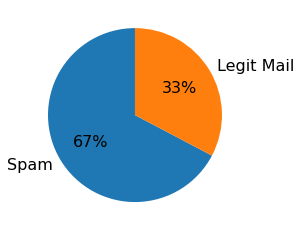

In [40]:
category_names = ['Spam', 'Legit Mail']
sizes = [amount_of_spam, amount_of_ham]

plt.pie(sizes, labels=category_names, textprops={'fontsize': 16}, startangle = 90, autopct = '%1.0f%%')
plt.show()

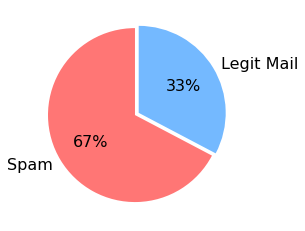

In [41]:
category_names = ['Spam', 'Legit Mail']
sizes = [amount_of_spam, amount_of_ham]
custom_colors = ['#ff7675', '#74b9ff']
plt.pie(sizes, labels=category_names, textprops={'fontsize': 16}, startangle = 90, autopct = '%1.0f%%', colors = custom_colors, explode = [0, 0.05])
plt.show()

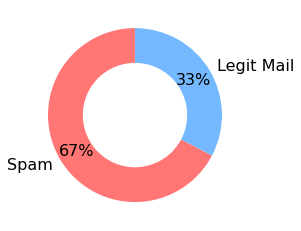

In [42]:
category_names = ['Spam', 'Legit Mail']
sizes = [amount_of_spam, amount_of_ham]
custom_colors = ['#ff7675', '#74b9ff']
plt.pie(sizes, labels=category_names, textprops={'fontsize': 16}, startangle = 90, autopct = '%1.0f%%', colors = custom_colors, pctdistance=0.79)

# draw circle
center_circle = plt.Circle((0,0), radius=0.6, fc='white')
plt.gca().add_artist(center_circle)

plt.show()

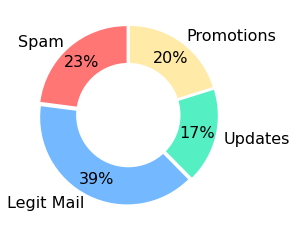

In [43]:
category_names = ['Spam', 'Legit Mail', 'Updates', 'Promotions']
sizes = [25, 43, 19, 22]
custom_colors = ['#ff7675', '#74b9ff', '#55efc4', "#ffeaa7"]
offset = [0.03, 0.03, 0.03, 0.03]
plt.pie(sizes, labels=category_names, textprops={'fontsize': 16}, startangle = 90, autopct = '%1.0f%%', colors = custom_colors, pctdistance=0.79, explode = offset)

# draw circle
center_circle = plt.Circle((0,0), radius=0.6, fc='white')
plt.gca().add_artist(center_circle)

plt.show()

# Natural Language Processing

### Text Pre-Processing

In [44]:
# Convert to Lower Case
msg = 'All work an no play makes a Jack a dull boy.'
msg.lower()

'all work an no play makes a jack a dull boy.'

### Download the NLTK Resources (Tokenizer & Stopwords)

In [45]:
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [46]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rasoul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [47]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rasoul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Tokenising 

In [48]:
msg = 'All work an no play makes a Jack a dull boy.'
word_tokenize(msg.lower())

['all',
 'work',
 'an',
 'no',
 'play',
 'makes',
 'a',
 'jack',
 'a',
 'dull',
 'boy',
 '.']

## Removing Stop Words

In [49]:
stop_words = set(stopwords.words('english'))

In [50]:
if 'hello' in stop_words: print("Found it!")

In [51]:
msg = 'All work an no play makes a Jack a dull boy. To be or not to be.'
words = word_tokenize(msg.lower())

filtered_words = []

for word in words:
    if word not in stop_words:
        filtered_words.append(word)
    else:
        continue

filtered_words

['work', 'play', 'makes', 'jack', 'dull', 'boy', '.', '.']

## Word Stems and Stemming

In [52]:
msg = 'All work an no play makes a Jack a dull boy. To be or not to be. \
Nobody expects the spanish Inquisition hidtonision!'
words = word_tokenize(msg.lower())

# stemmer = PorterStemmer()
stemmer = SnowballStemmer('english')

filtered_words = []

for word in words:
    if word not in stop_words:
        stemmed_word = stemmer.stem(word)
        filtered_words.append(stemmed_word)
    else:
        continue

filtered_words

['work',
 'play',
 'make',
 'jack',
 'dull',
 'boy',
 '.',
 '.',
 'nobodi',
 'expect',
 'spanish',
 'inquisit',
 'hidtonis',
 '!']

## Removing Punctuation

In [53]:
msg = 'All work an no play makes a Jack a dull boy. To be or not to be. ??? \
Nobody expects the spanish Inquisition ww!ww hidtonision!'
words = word_tokenize(msg.lower())

stemmer = SnowballStemmer('english')
filtered_words = []

for word in words:
    if word not in stop_words and word.isalpha():
        stemmed_word = stemmer.stem(word)
        filtered_words.append(stemmed_word)
    else:
        continue

filtered_words

['work',
 'play',
 'make',
 'jack',
 'dull',
 'boy',
 'nobodi',
 'expect',
 'spanish',
 'inquisit',
 'ww',
 'ww',
 'hidtonis']

## Removing HTML tags from Emails

In [54]:
from bs4 import BeautifulSoup

In [55]:
data.at[100, 'MESSAGE']

'<html>\n\n<head>\n\n<title>Digital Publishing Tools - Free Software Alert!</title>\n\n<meta http-equiv="Content-Type" content="text/html; charset=iso-8859-1">\n\n</head>\n\n<body bgcolor="#FFFFFF" text="#000000">\n\n<center>\n\n<table width="582" border="2" cellspacing="0" cellpadding="5" bordercolor="#0077CC">\n\n<tr>\n\n<td colspan="3" width="582" align="center" bgcolor="#0077CC"><!5122qHWL1-032pyeM4045IIgM3-001oYhw0942jQSK5-726UDqG9283lEHR8-145EiGhl64>\n\n<a href="http://3dpageturningebook.com" style="text-decoration:none;">\n\n<b><font face="Verdana, Arial, Helvetica, sans-serif" size="4" color="#FFFFFF">Publish Like a Professional with Digital Publishing Tools</font></b>\n\n</a>\n\n</td>\n\n</tr>\n\n\n\n<tr>\n\n<td colspan="1" width="204" valign="top">\n\n<b><font face="Verdana Arial, Helvetica, sans-serif" color="#000066" size="2">Easily Create Professional:</font></b>\n\n<font face="Verdana, Arial, Helvetica, sans-serif" size="1" color="#000066">\n\n<ul>\n\n<li>eBooks</li>\n\n<

In [56]:
soup = BeautifulSoup(data.at[100, 'MESSAGE'], 'html.parser')
soup

<html>
<head>
<title>Digital Publishing Tools - Free Software Alert!</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
</head>
<body bgcolor="#FFFFFF" text="#000000">
<center>
<table border="2" bordercolor="#0077CC" cellpadding="5" cellspacing="0" width="582">
<tr>
<td align="center" bgcolor="#0077CC" colspan="3" width="582"><!--5122qHWL1-032pyeM4045IIgM3-001oYhw0942jQSK5-726UDqG9283lEHR8-145EiGhl64-->
<a href="http://3dpageturningebook.com" style="text-decoration:none;">
<b><font color="#FFFFFF" face="Verdana, Arial, Helvetica, sans-serif" size="4">Publish Like a Professional with Digital Publishing Tools</font></b>
</a>
</td>
</tr>
<tr>
<td colspan="1" valign="top" width="204">
<b><font color="#000066" face="Verdana Arial, Helvetica, sans-serif" size="2">Easily Create Professional:</font></b>
<font color="#000066" face="Verdana, Arial, Helvetica, sans-serif" size="1">
<ul>
<li>eBooks</li>
<li>eBrochures</li>
<li>eCatalogs</li>
<li>Resumes</li>
<li>Newslette

In [57]:
print(soup.prettify())

<html>
 <head>
  <title>
   Digital Publishing Tools - Free Software Alert!
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
 </head>
 <body bgcolor="#FFFFFF" text="#000000">
  <center>
   <table border="2" bordercolor="#0077CC" cellpadding="5" cellspacing="0" width="582">
    <tr>
     <td align="center" bgcolor="#0077CC" colspan="3" width="582">
      <!--5122qHWL1-032pyeM4045IIgM3-001oYhw0942jQSK5-726UDqG9283lEHR8-145EiGhl64-->
      <a href="http://3dpageturningebook.com" style="text-decoration:none;">
       <b>
        <font color="#FFFFFF" face="Verdana, Arial, Helvetica, sans-serif" size="4">
         Publish Like a Professional with Digital Publishing Tools
        </font>
       </b>
      </a>
     </td>
    </tr>
    <tr>
     <td colspan="1" valign="top" width="204">
      <b>
       <font color="#000066" face="Verdana Arial, Helvetica, sans-serif" size="2">
        Easily Create Professional:
       </font>
      </b>
      <font color="#0

In [58]:
soup.get_text()

'\n\nDigital Publishing Tools - Free Software Alert!\n\n\n\n\n\n\n\n\nPublish Like a Professional with Digital Publishing Tools\n\n\n\n\n\nEasily Create Professional:\n\n\neBooks\neBrochures\neCatalogs\nResumes\nNewsletters\nPresentations\nMagazines\nPhoto Albums\nInvitations\nMuch, much more\n\n\n\n\nSave MONEY! - Save Trees\n\n\n\n\nSave on Printing, Postage and Advertising Costs\n\n\n\nDIGITAL PUBLISHING TOOLS\n\n\nDOWNLOAD NEW FREE Version NOW!\n\n\n*Limited Time Offer\n\n\nChoose from these\n\nDisplay Styles:\n\n\n3D Page Turn\nSlide Show\nSweep/Wipe\n\n\nEmbed hyperlinks and Link to anywhere Online, \n\n\n\nsuch as your Website, Order Page or Contact Form.\n\n\n\n\nDistribute via Floppy, CD-ROM, E-Mail or Online.\n\n\n\n\n\n\n\nTake your Marketing to the Next Level!\n\n\n\n\n\n\nFor More Info, Samples or a FREE Download, click the appropriate link to the right! \xa0\n\nServer demand is extremely high for this limited time Free Software offer. \xa0\n\nPlease try these links period

## Functions for Email Processing

In [59]:
def clean_message(message, stemmer=PorterStemmer(), stop_words=set(stopwords.words('english'))):
    
    #Remove HTML Tags
    
    soup = BeautifulSoup(message, 'html.parser')
    cleaned_text = soup.get_text()
    
    
    # Converts to Lower Case ans Splits Up the Words
    words = word_tokenize(cleaned_text.lower())
    
    filtered_words = []
    
    for word in words:
        #Removes the Stop Words and Punctuations
        if word not in stop_words and word.isalpha():
            filtered_words.append(stemmer.stem(word))
    
    return filtered_words

In [60]:
clean_message(email_body1)

['dear',
 'mr',
 'still',
 'good',
 'tide',
 'staff',
 'festiv',
 'season',
 'ahead',
 'christma',
 'crux',
 'fulli',
 'qualifi',
 'santa',
 'clau',
 'wonder',
 'whether',
 'might',
 'consid',
 'run',
 'santa',
 'grotto',
 'store',
 'wait',
 'probabl',
 'think',
 'make',
 'special',
 'well',
 'first',
 'made',
 'sever',
 'chang',
 'characteris',
 'father',
 'christma',
 'rather',
 'greet',
 'children',
 'shout',
 'ho',
 'ho',
 'ho',
 'prefer',
 'whisper',
 'phrase',
 'depend',
 'unfathom',
 'cruel',
 'world',
 'live',
 'addit',
 'gift',
 'rang',
 'felt',
 'hoop',
 'holder',
 'note',
 'also',
 'enclos',
 'sketch',
 'radic',
 'redesign',
 'santa',
 'outfit',
 'renam',
 'charact',
 'lord',
 'buckl',
 'would',
 'interest',
 'employ',
 'promis',
 'never',
 'let',
 'look',
 'forward',
 'hear',
 'best',
 'wish',
 'robin',
 'cooper',
 'excerpt',
 'book',
 'timewast',
 'letter',
 'robin',
 'cooper']

In [61]:
clean_message(data.at[100, 'MESSAGE'])

['digit',
 'publish',
 'tool',
 'free',
 'softwar',
 'alert',
 'publish',
 'like',
 'profession',
 'digit',
 'publish',
 'tool',
 'easili',
 'creat',
 'profession',
 'ebook',
 'ebrochur',
 'ecatalog',
 'resum',
 'newslett',
 'present',
 'magazin',
 'photo',
 'album',
 'invit',
 'much',
 'much',
 'save',
 'money',
 'save',
 'tree',
 'save',
 'print',
 'postag',
 'advertis',
 'cost',
 'digit',
 'publish',
 'tool',
 'download',
 'new',
 'free',
 'version',
 'time',
 'offer',
 'choos',
 'display',
 'style',
 'page',
 'turn',
 'slide',
 'show',
 'emb',
 'hyperlink',
 'link',
 'anywher',
 'onlin',
 'websit',
 'order',
 'page',
 'contact',
 'form',
 'distribut',
 'via',
 'floppi',
 'onlin',
 'take',
 'market',
 'next',
 'level',
 'info',
 'sampl',
 'free',
 'download',
 'click',
 'appropri',
 'link',
 'right',
 'server',
 'demand',
 'extrem',
 'high',
 'limit',
 'time',
 'free',
 'softwar',
 'offer',
 'pleas',
 'tri',
 'link',
 'period',
 'site',
 'seem',
 'slow',
 'unreach',
 'websit',
 'web

# Apply Cleaning and Tokenisation to all Messages

### Slicing DataFrames and Series & Creating Subsets

In [62]:
data.iat[2,0]

"1) Fight The Risk of Cancer!\n\nhttp://www.adclick.ws/p.cfm?o=315&s=pk007\n\n\n\n2) Slim Down - Guaranteed to lose 10-12 lbs in 30 days\n\nhttp://www.adclick.ws/p.cfm?o=249&s=pk007\n\n\n\n3) Get the Child Support You Deserve - Free Legal Advice\n\nhttp://www.adclick.ws/p.cfm?o=245&s=pk002\n\n\n\n4) Join the Web's Fastest Growing Singles Community\n\nhttp://www.adclick.ws/p.cfm?o=259&s=pk007\n\n\n\n5) Start Your Private Photo Album Online!\n\nhttp://www.adclick.ws/p.cfm?o=283&s=pk007\n\n\n\nHave a Wonderful Day,\n\nOffer Manager\n\nPrizeMama\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nIf you wish to leave this list please use the link below.\n\nhttp://www.qves.com/trim/?zzzz@spamassassin.taint.org%7C17%7C308417\n\n\n"

In [63]:
data.iloc[5:11]

,MESSAGE,CATEGORY,FILE_NAME
DOC_ID,,,
5,A POWERHOUSE GIFTING PROGRAM You Don't Want To...,1,00006.5ab5620d3d7c6c0db76234556a16f6c1
6,Help wanted. We are a 14 year old fortune 500...,1,00007.d8521faf753ff9ee989122f6816f87d7
7,<html>\n\n<head>\n\n<title>ReliaQuote - Save U...,1,00008.dfd941deb10f5eed78b1594b131c9266
8,TIRED OF THE BULL OUT THERE?\n\nWant To Stop L...,1,00009.027bf6e0b0c4ab34db3ce0ea4bf2edab
9,"Dear ricardo1 ,\n\n\n\n<html>\n\n<body>\n\n<ce...",1,00010.445affef4c70feec58f9198cfbc22997
10,Cellular Phone Accessories All At Below Wholes...,1,00011.61816b9ad167657773a427d890d0468e


In [64]:
first_emails = data.MESSAGE.iloc[0:3]
nested_list = first_emails.apply(clean_message)

In [65]:
flat_list = []
for sublist in nested_list:
    for item in sublist:
        flat_list.append(item)
        
len(flat_list)

192

In [66]:
flat_list = [item for sublist in nested_list for item in sublist]
flat_list

['save',
 'life',
 'insur',
 'spend',
 'life',
 'quot',
 'save',
 'g',
 'famili',
 'financi',
 'secur',
 'import',
 'life',
 'quot',
 'save',
 'ke',
 'buy',
 'life',
 'insur',
 'simpl',
 'afford',
 'provid',
 'free',
 'access',
 'best',
 'compani',
 'lowest',
 'rate',
 'life',
 'quot',
 'save',
 'fast',
 'save',
 'money',
 'let',
 'us',
 'help',
 'get',
 'start',
 'best',
 'ue',
 'countri',
 'new',
 'coverag',
 'save',
 'hundr',
 'even',
 'usand',
 'dollar',
 'request',
 'free',
 'quot',
 'lifequot',
 'save',
 'servic',
 'take',
 'less',
 'minut',
 'complet',
 'shop',
 'compar',
 'save',
 'type',
 'life',
 'insur',
 'click',
 'free',
 'quot',
 'protect',
 'famili',
 'best',
 'invest',
 'r',
 'make',
 'receipt',
 'email',
 'error',
 'wish',
 'remov',
 'list',
 'pleas',
 'click',
 'type',
 'remov',
 'resid',
 'state',
 'prohibit',
 'solicit',
 'ce',
 'pleas',
 'disregard',
 'email',
 'fight',
 'risk',
 'cancer',
 'http',
 'slim',
 'guarante',
 'lose',
 'lb',
 'day',
 'http',
 'get',
 'ch

In [67]:
%%time
# use apply() on all the messages in the DataFrame
nested_list = data.MESSAGE.apply(clean_message)

D:\Softwares\datascience\Anaconda3\lib\site-packages\bs4\__init__.py:357: UserWarning: "http://www.post-gazette.com/columnists/20020905brian5
" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


Wall time: 49.9 s


In [68]:
nested_list.head()

DOC_ID
0    [save, life, insur, spend, life, quot, save, g...
1    [fight, risk, cancer, http, slim, guarante, lo...
2    [fight, risk, cancer, http, slim, guarante, lo...
3    [adult, club, offer, free, membership, instant...
4    [thought, might, like, slim, guarante, lose, l...
Name: MESSAGE, dtype: object

In [69]:
nested_list.tail()

DOC_ID
5791    [http, bizarr, collect, stuf, anim, could, fet...
5792    [care, use, one, also, realli, cute, thing, ja...
5793    [sm, skip, montanaro, write, jeremi, put, anot...
5794    [mark, hammond, like, given, zodb, sound, attr...
5795    [hi, probabl, use, whatsoev, also, problem, re...
Name: MESSAGE, dtype: object

### Using Logic to Slice DataFrames

In [70]:
data[data.CATEGORY == 1].shape

(1896, 3)

In [71]:
data[data.CATEGORY == 1].tail()

,MESSAGE,CATEGORY,FILE_NAME
DOC_ID,,,
1891,"<html>\n\n<head>\n\n<meta http-equiv=""content-...",1,01396.e80a10644810bc2ae3c1b58c5fd38dfa
1892,This is a multi-part message in MIME format.\n...,1,01397.f75f0dd0dd923faefa3e9cc5ecb8c906
1893,"Dear Subscriber,\n\n\n\nIf I could show you a ...",1,01398.8ca7045aae4184d56e8509dc5ad6d979
1894,****Mid-Summer Customer Appreciation SALE!****...,1,01399.2319643317e2c5193d574e40a71809c2
1895,ATTN:SIR/MADAN \n\n\n\n ...,1,01400.b444b69845db2fa0a4693ca04e6ac5c5


In [72]:
doc_ids_spam = data[data.CATEGORY == 1].index
doc_ids_ham = data[data.CATEGORY == 0].index

In [73]:
doc_ids_ham

Int64Index([1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905,
            ...
            5786, 5787, 5788, 5789, 5790, 5791, 5792, 5793, 5794, 5795],
           dtype='int64', name='DOC_ID', length=3900)

### Subsetting a Series with an Index

In [74]:
nested_list_ham = nested_list.loc[doc_ids_ham]

In [75]:
nested_list_ham.shape

(3900,)

In [76]:
nested_list_ham.tail()

DOC_ID
5791    [http, bizarr, collect, stuf, anim, could, fet...
5792    [care, use, one, also, realli, cute, thing, ja...
5793    [sm, skip, montanaro, write, jeremi, put, anot...
5794    [mark, hammond, like, given, zodb, sound, attr...
5795    [hi, probabl, use, whatsoev, also, problem, re...
Name: MESSAGE, dtype: object

In [77]:
nested_list_spam = nested_list.loc[doc_ids_spam]

In [78]:
flat_list_ham = [item for sublist in nested_list_ham for item in sublist]
normal_words = pd.Series(flat_list_ham).value_counts()

normal_words.shape[0] #total number of unique words in the non-spam message

20755

In [79]:
normal_words[:10]

http      7561
use       3630
list      2878
one       2371
get       2284
mail      2255
would     2003
like      1928
messag    1847
work      1798
dtype: int64

In [80]:
flat_list_spam = [item for sublist in nested_list_spam for item in sublist]
spammy_words = pd.Series(flat_list_spam).value_counts()

spammy_words.shape[0] #total number of unique words in the non-spam message

13284

In [81]:
spammy_words[:10]

http      3101
email     3094
free      2555
click     2058
receiv    1987
list      1974
get       1903
pleas     1842
busi      1792
order     1743
dtype: int64

# Creating a Word Cloud

In [82]:
from wordcloud import WordCloud

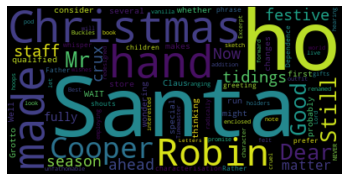

In [83]:
word_cloud = WordCloud().generate(email_body1)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [84]:
nltk.download('gutenberg')
nltk.download('shakespeare')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\Rasoul\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package shakespeare to
[nltk_data]     C:\Users\Rasoul\AppData\Roaming\nltk_data...
[nltk_data]   Package shakespeare is already up-to-date!


True

In [85]:
example_corpus = nltk.corpus.gutenberg.words('melville-moby_dick.txt')
len(example_corpus)

260819

In [86]:
type(example_corpus)

nltk.corpus.reader.util.StreamBackedCorpusView

In [87]:
example_corpus

['[', 'Moby', 'Dick', 'by', 'Herman', 'Melville', ...]

In [88]:
word_list = [''.join(word) for word in example_corpus]
word_list

['[',
 'Moby',
 'Dick',
 'by',
 'Herman',
 'Melville',
 '1851',
 ']',
 'ETYMOLOGY',
 '.',
 '(',
 'Supplied',
 'by',
 'a',
 'Late',
 'Consumptive',
 'Usher',
 'to',
 'a',
 'Grammar',
 'School',
 ')',
 'The',
 'pale',
 'Usher',
 '--',
 'threadbare',
 'in',
 'coat',
 ',',
 'heart',
 ',',
 'body',
 ',',
 'and',
 'brain',
 ';',
 'I',
 'see',
 'him',
 'now',
 '.',
 'He',
 'was',
 'ever',
 'dusting',
 'his',
 'old',
 'lexicons',
 'and',
 'grammars',
 ',',
 'with',
 'a',
 'queer',
 'handkerchief',
 ',',
 'mockingly',
 'embellished',
 'with',
 'all',
 'the',
 'gay',
 'flags',
 'of',
 'all',
 'the',
 'known',
 'nations',
 'of',
 'the',
 'world',
 '.',
 'He',
 'loved',
 'to',
 'dust',
 'his',
 'old',
 'grammars',
 ';',
 'it',
 'somehow',
 'mildly',
 'reminded',
 'him',
 'of',
 'his',
 'mortality',
 '.',
 '"',
 'While',
 'you',
 'take',
 'in',
 'hand',
 'to',
 'school',
 'others',
 ',',
 'and',
 'to',
 'teach',
 'them',
 'by',
 'what',
 'name',
 'a',
 'whale',
 '-',
 'fish',
 'is',
 'to',
 'be',
 

In [89]:
novel_as_string = ' '.join(word_list)
novel_as_string

'[ Moby Dick by Herman Melville 1851 ] ETYMOLOGY . ( Supplied by a Late Consumptive Usher to a Grammar School ) The pale Usher -- threadbare in coat , heart , body , and brain ; I see him now . He was ever dusting his old lexicons and grammars , with a queer handkerchief , mockingly embellished with all the gay flags of all the known nations of the world . He loved to dust his old grammars ; it somehow mildly reminded him of his mortality . " While you take in hand to school others , and to teach them by what name a whale - fish is to be called in our tongue leaving out , through ignorance , the letter H , which almost alone maketh the signification of the word , you deliver that which is not true ." -- HACKLUYT " WHALE . ... Sw . and Dan . HVAL . This animal is named from roundness or rolling ; for in Dan . HVALT is arched or vaulted ." -- WEBSTER \' S DICTIONARY " WHALE . ... It is more immediately from the Dut . and Ger . WALLEN ; A . S . WALW - IAN , to roll , to wallow ." -- RICHA

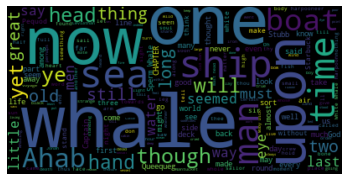

In [90]:
word_cloud = WordCloud().generate(novel_as_string)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [91]:
from PIL import Image
import numpy as np

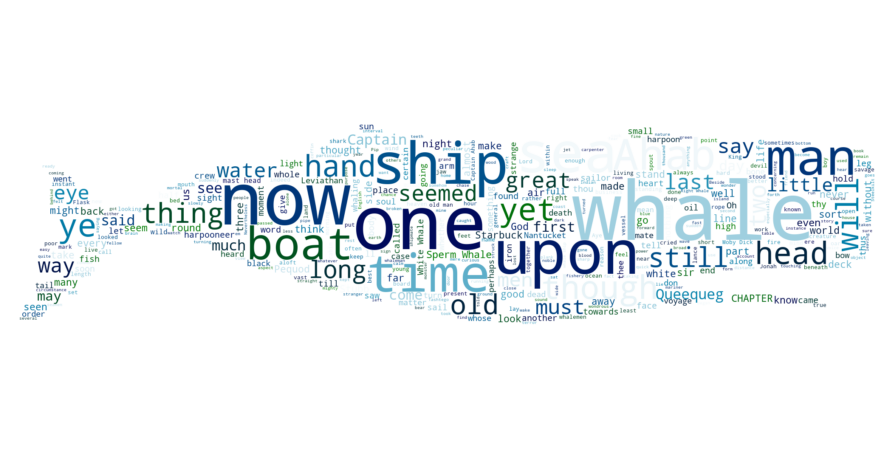

In [92]:
icon = Image.open(WHALE_FILE)
image_mask = Image.new(mode='RGB', size=icon.size, color=(255,255,255))
image_mask.paste(icon, box=icon)

rgb_array = np.array(image_mask) #converts the image object to an array

word_cloud = WordCloud(mask=rgb_array, background_color = 'white',
                      max_words=400, colormap='ocean')

word_cloud.generate(novel_as_string)
plt.figure(figsize=[16,8])
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [93]:
rgb_array[1023,2047]

array([255, 255, 255], dtype=uint8)

In [94]:
rgb_array[500,1000]

array([0, 0, 0], dtype=uint8)

In [95]:
hamlet_corpus = nltk.corpus.gutenberg.words('shakespeare-hamlet.txt')
hamlet_corpus

['[', 'The', 'Tragedie', 'of', 'Hamlet', 'by', ...]

In [96]:
word_list = [''.join(word) for word in hamlet_corpus]
word_list

['[',
 'The',
 'Tragedie',
 'of',
 'Hamlet',
 'by',
 'William',
 'Shakespeare',
 '1599',
 ']',
 'Actus',
 'Primus',
 '.',
 'Scoena',
 'Prima',
 '.',
 'Enter',
 'Barnardo',
 'and',
 'Francisco',
 'two',
 'Centinels',
 '.',
 'Barnardo',
 '.',
 'Who',
 "'",
 's',
 'there',
 '?',
 'Fran',
 '.',
 'Nay',
 'answer',
 'me',
 ':',
 'Stand',
 '&',
 'vnfold',
 'your',
 'selfe',
 'Bar',
 '.',
 'Long',
 'liue',
 'the',
 'King',
 'Fran',
 '.',
 'Barnardo',
 '?',
 'Bar',
 '.',
 'He',
 'Fran',
 '.',
 'You',
 'come',
 'most',
 'carefully',
 'vpon',
 'your',
 'houre',
 'Bar',
 '.',
 "'",
 'Tis',
 'now',
 'strook',
 'twelue',
 ',',
 'get',
 'thee',
 'to',
 'bed',
 'Francisco',
 'Fran',
 '.',
 'For',
 'this',
 'releefe',
 'much',
 'thankes',
 ':',
 "'",
 'Tis',
 'bitter',
 'cold',
 ',',
 'And',
 'I',
 'am',
 'sicke',
 'at',
 'heart',
 'Barn',
 '.',
 'Haue',
 'you',
 'had',
 'quiet',
 'Guard',
 '?',
 'Fran',
 '.',
 'Not',
 'a',
 'Mouse',
 'stirring',
 'Barn',
 '.',
 'Well',
 ',',
 'goodnight',
 '.',
 'If',

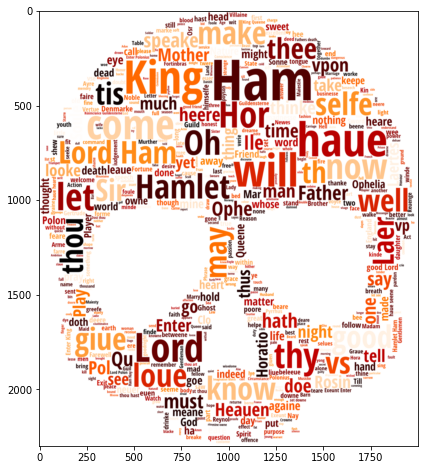

In [101]:
hamlet_as_string = ' '.join(word_list)
skull_icon = Image.open(SKULL_FILE)
image_mask = Image.new(mode='RGB', size=skull_icon.size, color=(255,255,255))
image_mask.paste(skull_icon, box=skull_icon)
rgb_array = np.array(image_mask)

word_cloud = WordCloud(mask=rgb_array, background_color='white',
                      max_words=600, colormap='gist_heat', font_path=CUSTOM_FONT_FILE, max_font_size=300)
word_cloud.generate(hamlet_as_string)
plt.figure(figsize=[16,8])
plt.imshow(word_cloud, interpolation='bilinear')
plt.show()

# Word Cloud of Ham and Spam Messages

In [98]:
# icon = Image.open(THUMBS_UP_FILE)
# image_mask = Image.new(mode='RGB', size=icon.size, color=(255,255,255))
# image_mask.paste(icon, box=icon)

# rgb_array = np.array(image_mask) #converts the image object to an array

# # Generate the text as a string for the word cloud

# ham_str = ''.join(flat_list_ham)

# word_cloud = WordCloud(mask=rgb_array, background_color = 'white',
#                       max_words=400, colormap='ocean')

# word_cloud.generate(ham_str)
# plt.figure(figsize=[16,8])
# plt.imshow(word_cloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()

In [99]:
# icon = Image.open(THUMBS_DOWN_FILE)
# image_mask = Image.new(mode='RGB', size=icon.size, color=(255,255,255))
# image_mask.paste(icon, box=icon)

# rgb_array = np.array(image_mask) #converts the image object to an array

# # Generate the text as a string for the word cloud

# spam_str = ''.join(flat_list_spam)

# word_cloud = WordCloud(mask=rgb_array, background_color = 'white',
#                       max_words=500, colormap='gist_heat', font_path=CUSTOM_FONT_FILE, max_font_size=300)

# word_cloud.generate(spam_str)
# plt.figure(figsize=[16,8])
# plt.imshow(word_cloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()

# Generate Vocabulary and Dictionary

In [102]:
stemmed_nested_list = data.MESSAGE.apply(clean_message)
flat_stemmed_list = [item for sublist in stemmed_nested_list for item in sublist]

D:\Softwares\datascience\Anaconda3\lib\site-packages\bs4\__init__.py:357: UserWarning: "http://www.post-gazette.com/columnists/20020905brian5
" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


In [103]:
unique_words = pd.Series(flat_stemmed_list).value_counts()
print('Nr of unique words', unique_words.shape[0])
unique_words.head()

Nr of unique words 27305


http     10662
use       5017
list      4852
email     4370
get       4187
dtype: int64

In [106]:
frequent_words = unique_words[0:VOCAB_SIZE]
print('Most common words: \n', frequent_words[:10])

Most common words: 
 http     10662
use       5017
list      4852
email     4370
get       4187
mail      3985
one       3905
free      3171
time      3090
work      2880
dtype: int64


In [107]:
type(frequent_words)

pandas.core.series.Series

## Create Vocabulary DataFrame with a WORD_ID

In [111]:
word_ids=list(range(0, VOCAB_SIZE))
vocab = pd.DataFrame({'VOCAB_WORD': frequent_words.index.values}, index=word_ids)
vocab.index.name ='WORD_ID'
vocab.head()

,VOCAB_WORD
WORD_ID,
0,http
1,use
2,list
3,email
4,get


## Save the Vocabulary as a CSV File

In [114]:
vocab.to_csv(WORD_ID_FILE, index_label=vocab.index.name, header=vocab.VOCAB_WORD.name)

# Checking if a Word is Part of the Vocabulary

In [120]:
'http' == vocab.VOCAB_WORD.any()

True

In [121]:
any(vocab.VOCAB_WORD == 'http')

True

In [124]:
'http' in set(vocab.VOCAB_WORD)

True

# Find the Email with the Most Number of Words

In [131]:
# For loop

clean_email_length = []
for sublist in stemmed_nested_list:
    clean_email_length.append(len(sublist))

print(clean_email_length)

[92, 56, 44, 205, 45, 161, 47, 162, 202, 43, 55, 23, 44, 73, 58, 235, 47, 208, 36, 56, 223, 192, 0, 93, 14, 208, 44, 24, 61, 94, 312, 56, 141, 72, 55, 1060, 46, 139, 2, 90, 78, 4, 47, 70, 44, 74, 38, 12, 38, 60, 47, 51, 71, 80, 25, 273, 36, 60, 19, 18, 14, 40, 57, 18, 77, 28, 102, 40, 226, 68, 120, 5, 52, 0, 40, 40, 208, 0, 40, 146, 62, 114, 58, 253, 1216, 49, 0, 65, 52, 141, 15, 0, 90, 70, 2, 196, 50, 50, 50, 213, 117, 43, 80, 43, 319, 242, 9, 36, 97, 25, 52, 333, 47, 60, 0, 38, 78, 97, 79, 55, 102, 34, 70, 55, 24, 129, 50, 0, 39, 74, 43, 72, 47, 157, 0, 27, 223, 97, 0, 58, 84, 213, 75, 47, 18, 166, 20, 112, 104, 187, 6, 40, 54, 79, 276, 110, 208, 6, 479, 62, 17, 175, 79, 47, 74, 80, 258, 33, 218, 38, 36, 110, 93, 61, 55, 41, 108, 80, 84, 0, 52, 1389, 108, 97, 23, 185, 1, 117, 258, 28, 142, 195, 177, 0, 97, 109, 1465, 0, 108, 150, 113, 38, 153, 38, 42, 0, 0, 383, 185, 77, 330, 14, 92, 92, 166, 372, 187, 241, 143, 254, 14, 97, 135, 223, 65, 90, 226, 217, 129, 38, 94, 204, 258, 215, 146

In [126]:
clean_email_length2 = [len(sublist) for sublist in stemmed_nested_list]
print('Nr words in the longest email:', max(clean_email_length2))

Nr words in the longest email: 7671


In [129]:
print('Email position in the list (and the DataFrame)', np.argmax(clean_email_length2))

Email position in the list (and the DataFrame) 5775


In [133]:
stemmed_nested_list[np.argmax(clean_email_length2)]

['yahoo',
 'group',
 'sponsor',
 'dvd',
 'free',
 'p',
 'join',
 'http',
 'new',
 'version',
 'unison',
 'avail',
 'test',
 'incorpor',
 'sever',
 'small',
 'improv',
 'main',
 'chang',
 'fix',
 'bug',
 'potenti',
 'seriou',
 'safeti',
 'consequ',
 'small',
 'number',
 'user',
 'habit',
 'run',
 'one',
 'instanc',
 'unison',
 'time',
 'parallel',
 'user',
 'strongli',
 'encourag',
 'upgrad',
 'other',
 'wait',
 'wish',
 'releas',
 'includ',
 'execut',
 'linux',
 'solari',
 'window',
 'look',
 'maintain',
 'moment',
 'none',
 'activ',
 'develop',
 'regularli',
 'use',
 'unison',
 'window',
 'machin',
 'configur',
 'properli',
 'build',
 'execut',
 'export',
 'grab',
 'http',
 'enjoy',
 'benjamin',
 'chang',
 'sinc',
 'ad',
 'prefer',
 'maxthread',
 'use',
 'limit',
 'number',
 'simultan',
 'file',
 'transfer',
 'ad',
 'backupdir',
 'prefer',
 'control',
 'backup',
 'file',
 'store',
 'basic',
 'support',
 'ad',
 'osx',
 'particular',
 'unison',
 'recogn',
 'one',
 'host',
 'synchron',
 

In [134]:
data.at[np.argmax(clean_email_length2), 'MESSAGE']

'------------------------ Yahoo! Groups Sponsor ---------------------~-->\n\n4 DVDs Free +s&p Join Now\n\nhttp://us.click.yahoo.com/pt6YBB/NXiEAA/Ey.GAA/26EolB/TM\n\n---------------------------------------------------------------------~->\n\n\n\nA new version of unison is now available for testing.  It incorporates\n\nseveral small improvements over 2.9.1, but the main change is a fix to\n\na bug that had potentially serious safety consequences, but only for\n\nthe very small number of users that are in the habit of running more\n\nthan one instance of Unison at a time, in parallel.  These users are\n\nstrongly encouraged to upgrade.  Others can wait if they wish.\n\n\n\nThe release includes pre-built executables for Linux and Solaris, but\n\nnot Windows.  (We are looking for a Unison-Windows maintainer -- at\n\nthe moment, none of the active developers are regularly using Unison\n\non Windows, and we do not have a machine that is configured properly\n\nfor building executables for exp

# Generate Features & a Sparse Matrix
### Creating a DataFrame with one Word per Column

In [135]:
type(stemmed_nested_list)

pandas.core.series.Series

In [136]:
type(stemmed_nested_list[2])

list

In [137]:
type(stemmed_nested_list.tolist())

list

In [138]:
word_columns_df = pd.DataFrame.from_records(stemmed_nested_list.tolist())

In [139]:
word_columns_df.head()

,0,1,2,3,4,5,6,7,8,9,...,7661,7662,7663,7664,7665,7666,7667,7668,7669,7670
0,save,life,insur,spend,life,quot,save,g,famili,financi,...,None,None,None,None,None,None,None,None,None,None
1,fight,risk,cancer,http,slim,guarante,lose,lb,day,http,...,None,None,None,None,None,None,None,None,None,None
2,fight,risk,cancer,http,slim,guarante,lose,lb,day,http,...,None,None,None,None,None,None,None,None,None,None
3,adult,club,offer,free,membership,instant,access,site,user,name,...,None,None,None,None,None,None,None,None,None,None
4,thought,might,like,slim,guarante,lose,lb,day,http,fight,...,None,None,None,None,None,None,None,None,None,None


In [140]:
word_columns_df.shape

(5796, 7671)

## Splitting the Data into a Training and Testing Dataset

In [141]:
from sklearn.model_selection import train_test_split

In [142]:
X_train, X_test, y_train, y_test = train_test_split(word_columns_df, data.CATEGORY, test_size=0.3, random_state=42)

In [143]:
print('Nr of training samples', X_train.shape[0])
print('Fraction of training set', X_train.shape[0] / word_columns_df.shape[0])

Nr of training samples 4057
Fraction of training set 0.6999654934437544


In [146]:
X_train.index.name = X_test.index.name = 'DOC_ID'
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,7661,7662,7663,7664,7665,7666,7667,7668,7669,7670
DOC_ID,,,,,,,,,,,,,,,,,,,,,
4844,ye,inde,agent,directori,verita,cd,unix,subdirectori,file,call,...,None,None,None,None,None,None,None,None,None,None
4727,problem,come,tri,instal,harddissssk,like,alreadi,mount,http,yahoo,...,None,None,None,None,None,None,None,None,None,None
5022,origin,messag,date,mon,aug,chad,norwood,sven,cc,subject,...,None,None,None,None,None,None,None,None,None,None
3504,inlin,folk,sever,major,internet,outag,morn,across,major,provid,...,None,None,None,None,None,None,None,None,None,None
3921,url,http,date,bath,chronicl,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [147]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,7661,7662,7663,7664,7665,7666,7667,7668,7669,7670
DOC_ID,,,,,,,,,,,,,,,,,,,,,
4675,interest,alway,wonder,thing,bad,exampl,goto,languag,support,goto,...,None,None,None,None,None,None,None,None,None,None
4220,url,http,date,final,gdc,europ,review,confernec,session,ect,...,None,None,None,None,None,None,None,None,None,None
2484,stephen,william,mailto,swilliam,weaken,food,transact,argument,note,neighborhood,...,None,None,None,None,None,None,None,None,None,None
2418,el,mon,sep,bitbitch,wrote,eugen,mani,homo,friend,lover,...,None,None,None,None,None,None,None,None,None,None
5110,music,school,joke,american,conductor,european,conductor,talk,european,conductor,...,None,None,None,None,None,None,None,None,None,None


In [150]:
y_test.head()

DOC_ID
4675    0
4220    0
2484    0
2418    0
5110    0
Name: CATEGORY, dtype: int64

In [149]:
# Document IDs match:
y_train.head()

DOC_ID
4844    0
4727    0
5022    0
3504    0
3921    0
Name: CATEGORY, dtype: int64

### Create a Sparse Matrix for the Training Data

In [153]:
word_index = pd.Index(vocab.VOCAB_WORD)
type(word_index)

pandas.core.indexes.base.Index

In [154]:
word_index[3]

'email'

In [155]:
vocab.VOCAB_WORD.head()

WORD_ID
0     http
1      use
2     list
3    email
4      get
Name: VOCAB_WORD, dtype: object

In [156]:
word_index.get_loc('thu')

396

In [157]:
word_index[396]

'thu'

In [ ]:
word_index.get_loc()

In [160]:
def make_sparse_matrix(df, indexed_words, labels):
    """
    Returns Sparse Matrix as DataFrame.
    df: A dataframe with words in the columns with a document ID as an index (X_train or X_test)
    indexed_words: index of words ordered by word id
    labels: category as a series (y_train or y_test)
    """
    
    nr_rows = df.shape[0]
    nr_cols = df.shape[1]
    word_set = set(indexed_words)
    dict_list = []
    
    for i in range(nr_rows):
        for j in range(nr_cols):
            
            word = df.iat[i, j]
            if word in word_set:
                doc_id = df.index[i]
                word_id = indexed_words.get_loc(word)
                category = labels.at[doc_id]
                
                item = {'LABEL' : category, 'DOC_ID': doc_id,
                       'OCCURENCE' : 1, 'WORD_ID' : word_id}
                
                dict_list.append(item)
    
    return pd.DataFrame(dict_list)

In [161]:
%%time
sparse_train_df = make_sparse_matrix(X_train, word_index, y_train)

Wall time: 4min 14s


In [162]:
sparse_train_df.head()

,LABEL,DOC_ID,OCCURENCE,WORD_ID
0,0,4844,1,266
1,0,4844,1,1267
2,0,4844,1,506
3,0,4844,1,310
4,0,4844,1,254


In [163]:
sparse_train_df.shape

(430990, 4)

In [164]:
sparse_train_df[-5:]

,LABEL,DOC_ID,OCCURENCE,WORD_ID
430985,1,860,1,47
430986,1,860,1,1438
430987,1,860,1,26
430988,1,860,1,19
430989,1,860,1,126


### Combine Occurences with the Pandas groupby() Method

In [165]:
train_grouped = sparse_train_df.groupby(['DOC_ID', 'WORD_ID', 'LABEL']).sum()
train_grouped

OCCURENCE
DOC_ID WORD_ID LABEL           
0      2       1              1
       3       1              2
       4       1              1
       7       1              3
       11      1              1
...                         ...
5795   2059    0              2
       2061    0              1
       2289    0              1
       2350    0              1
       2418    0              1

[258323 rows x 1 columns]

In [166]:
vocab.at[0, 'VOCAB_WORD']

'http'

In [167]:
data.MESSAGE[0]

'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN">\n\n<HTML><HEAD>\n\n<META content=3D"text/html; charset=3Dwindows-1252" http-equiv=3DContent-T=\n\nype>\n\n<META content=3D"MSHTML 5.00.2314.1000" name=3DGENERATOR></HEAD>\n\n<BODY><!-- Inserted by Calypso -->\n\n<TABLE border=3D0 cellPadding=3D0 cellSpacing=3D2 id=3D_CalyPrintHeader_ r=\n\nules=3Dnone \n\nstyle=3D"COLOR: black; DISPLAY: none" width=3D"100%">\n\n  <TBODY>\n\n  <TR>\n\n    <TD colSpan=3D3>\n\n      <HR color=3Dblack noShade SIZE=3D1>\n\n    </TD></TR></TD></TR>\n\n  <TR>\n\n    <TD colSpan=3D3>\n\n      <HR color=3Dblack noShade SIZE=3D1>\n\n    </TD></TR></TBODY></TABLE><!-- End Calypso --><!-- Inserted by Calypso=\n\n --><FONT \n\ncolor=3D#000000 face=3DVERDANA,ARIAL,HELVETICA size=3D-2><BR></FONT></TD><=\n\n/TR></TABLE><!-- End Calypso --><FONT color=3D#ff0000 \n\nface=3D"Copperplate Gothic Bold" size=3D5 PTSIZE=3D"10">\n\n<CENTER>Save up to 70% on Life Insurance.</CENTER></FONT><FONT color=3D#ff=\n\n0000

In [169]:
train_grouped = train_grouped.reset_index()
train_grouped.tail()

,index,DOC_ID,WORD_ID,LABEL,OCCURENCE
258318,258318,5795,2059,0,2
258319,258319,5795,2061,0,1
258320,258320,5795,2289,0,1
258321,258321,5795,2350,0,1
258322,258322,5795,2418,0,1


In [171]:
vocab.at[2059, 'VOCAB_WORD']

'swap'

In [172]:
train_grouped.shape

(258323, 5)

### Save Training Data as .txt File

In [175]:
np.savetxt(TRAINING_DATA_FILE, train_grouped, fmt='%d')
train_grouped.columns

Index(['index', 'DOC_ID', 'WORD_ID', 'LABEL', 'OCCURENCE'], dtype='object')

In [177]:
 X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,7661,7662,7663,7664,7665,7666,7667,7668,7669,7670
DOC_ID,,,,,,,,,,,,,,,,,,,,,
4675,interest,alway,wonder,thing,bad,exampl,goto,languag,support,goto,...,None,None,None,None,None,None,None,None,None,None
4220,url,http,date,final,gdc,europ,review,confernec,session,ect,...,None,None,None,None,None,None,None,None,None,None
2484,stephen,william,mailto,swilliam,weaken,food,transact,argument,note,neighborhood,...,None,None,None,None,None,None,None,None,None,None
2418,el,mon,sep,bitbitch,wrote,eugen,mani,homo,friend,lover,...,None,None,None,None,None,None,None,None,None,None
5110,music,school,joke,american,conductor,european,conductor,talk,european,conductor,...,None,None,None,None,None,None,None,None,None,None


In [178]:
y_test.head()

DOC_ID
4675    0
4220    0
2484    0
2418    0
5110    0
Name: CATEGORY, dtype: int64

In [179]:
X_test.shape

(1739, 7671)

In [181]:
%%time
sparse_test_df = make_sparse_matrix(X_test, word_index, y_test)

Wall time: 1min 46s


In [182]:
sparse_test_df.shape

(203143, 4)

In [185]:
test_grouped = sparse_test_df.groupby(['DOC_ID', 'WORD_ID', 'LABEL']).sum().reset_index()
test_grouped.head()

,DOC_ID,WORD_ID,LABEL,OCCURENCE
0,8,2,1,1
1,8,3,1,4
2,8,4,1,2
3,8,5,1,1
4,8,6,1,2


In [186]:
np.savetxt(TEST_DATA_FILE, test_grouped, fmt='%d')

# Pre-Processing Subtleties and Checking Your Understanding (38)

In [187]:
train_doc_ids = set(train_grouped.DOC_ID)
test_doc_ids = set(test_grouped.DOC_ID)

In [188]:
len(test_doc_ids)

1724

In [189]:
len(X_test)

1739

In [190]:
X_test.index

Int64Index([4675, 4220, 2484, 2418, 5110, 1161, 3296,  101, 3337,  401,
            ...
            3674, 4885, 5120, 1338, 2671, 5295, 5740, 5069, 1293, 4354],
           dtype='int64', name='DOC_ID', length=1739)

In [191]:
set(X_test.index.values) - test_doc_ids #emails that are excluded from the data

{134, 179, 240, 274, 298, 339, 439, 471, 670, 734, 765, 945, 1544, 1670, 1700}

In [195]:
data.MESSAGE[134]

'------=_NextPart_000_00E8_85C13B1D.B7243B86\n\nContent-Type: text/html; charset="iso-8859-1"\n\nContent-Transfer-Encoding: base64\n\n\n\n\n\nPGh0bWw+DQoNCjxib2R5IGJnY29sb3I9IiNGRkZGRkYiIHRleHQ9IiMwMDAw\n\nMDAiPiANCjxwIGFsaWduPSJjZW50ZXIiPjxhIGhyZWY9Imh0dHA6Ly93d3cu\n\nZGlyZWN0d2Vic3RvcmUuY29tL3RveXMvaW5kZXguaHRtbCI+PGltZyBzcmM9\n\nImh0dHA6Ly93d3cuZGlyZWN0d2Vic3RvcmUuY29tL21waWMuanBnIiB3aWR0\n\naD0iNTAwIiBoZWlnaHQ9IjMzOSIgYm9yZGVyPSIwIj48L2E+PGJyPiANCjxm\n\nb250IHNpemU9IjMiIGZhY2U9IkFyaWFsLCBIZWx2ZXRpY2EsIHNhbnMtc2Vy\n\naWYiPjxhIGhyZWY9Imh0dHA6Ly93d3cuZGlyZWN0d2Vic3RvcmUuY29tL3Rv\n\neXMvaW5kZXguaHRtbCI+PGI+RU5URVIgDQpOT1cgaWYgeW91IGFyZSAxOCBh\n\nbmQgb3ZlcjwvYj48L2E+PC9mb250PjwvcD4gDQo8cCBhbGlnbj0iY2VudGVy\n\nIj48Zm9udCBmYWNlPSJBcmlhbCwgSGVsdmV0aWNhLCBzYW5zLXNlcmlmIiBz\n\naXplPSI0IiBjb2xvcj0iI0ZGMDAwMCI+PGI+U1BFQ0lBTCANCk9GRkVSPGJy\n\nPiANCjxmb250IHNpemU9IjUiPjMwIERheXMgPGk+RlJFRSBhY2Nlc3M8L2k+\n\nIDwvZm9udD48YnI+IA0KdG8gdGhlIGxhcmdlc3QgQWR1bHRzaXRlIG9uIHRo\n\nZSB3ZWIuPGJyPiANCjwvYj4gPG

In [196]:
data.loc[134] #then open in text editor to check whats wrong

MESSAGE      ------=_NextPart_000_00E8_85C13B1D.B7243B86\n\...
CATEGORY                                                     1
FILE_NAME               00135.00e388e3b23df6278a8845047ca25160
Name: 134, dtype: object

In [201]:
clean_message(data.at[134, 'MESSAGE'])

[]